In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:
from quickclus import QuickClus

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
clf = QuickClus(n_components = 2)

In [6]:
clf.fit(df.drop("CustomerID", axis = 1))

In [7]:
results = clf.assing_results(df)

In [8]:
results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [9]:
clf.cluster_summary(results.drop("CustomerID", axis = 1), metric = "mean", include_cat = True)

,data_prop,data_count,Age,Annual Income (k$),Spending Score (1-100),Gender
-1,0.230,46,34.913043,65.108696,51.500000,"[Female, Male]"
4,0.195,39,37.076923,49.358974,44.487179,Female
1,0.170,34,37.441176,48.676471,41.882353,Male
3,0.170,34,45.558824,56.117647,45.647059,Female
0,0.140,28,32.321429,85.428571,81.428571,Female
2,0.095,19,52.157895,65.105263,35.789474,Male


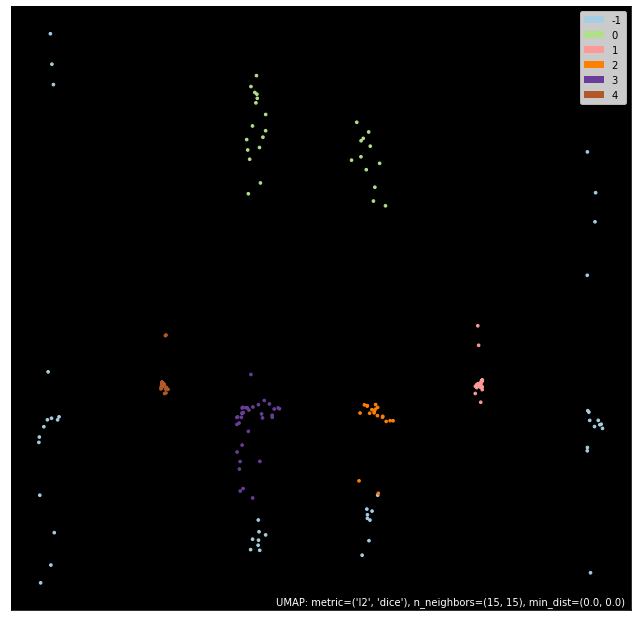

In [10]:
clf.plot_2d_labels()

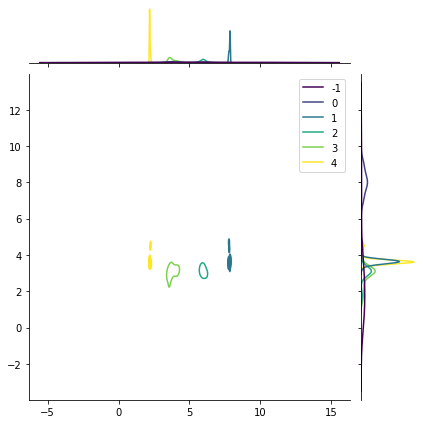

In [11]:
clf.plot_embedding_labels()

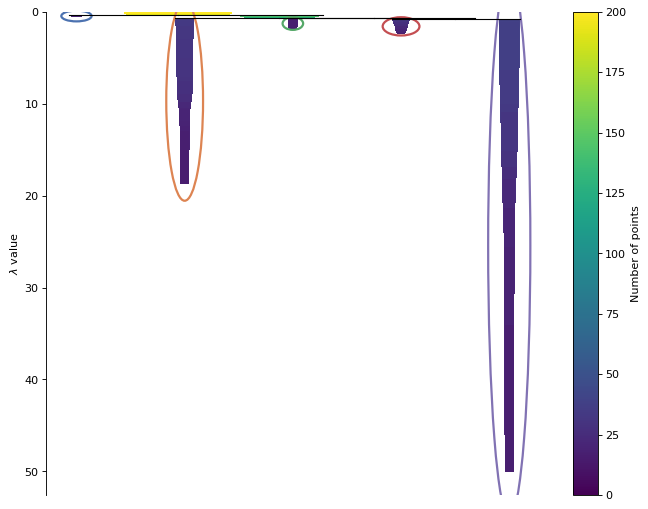

In [12]:
clf.plot_condensed_tree()

In [13]:
clf.tune_model()

[I 2022-04-06 13:22:55,294] A new study created in memory with name: no-name-73c3f15d-83ff-4f40-ae77-77fc4ce3c9dc
[I 2022-04-06 13:22:55,351] Trial 0 finished with value: 0.17206563856965645 and parameters: {'min_cluster': 13, 'min_samples': 23}. Best is trial 0 with value: 0.17206563856965645.
[I 2022-04-06 13:22:55,416] Trial 1 finished with value: 0.3450567101949903 and parameters: {'min_cluster': 16, 'min_samples': 22}. Best is trial 1 with value: 0.3450567101949903.
[I 2022-04-06 13:22:55,462] Trial 2 finished with value: 0.24160518540548248 and parameters: {'min_cluster': 30, 'min_samples': 10}. Best is trial 1 with value: 0.3450567101949903.
[I 2022-04-06 13:22:55,508] Trial 3 finished with value: 0.33033507477713503 and parameters: {'min_cluster': 30, 'min_samples': 3}. Best is trial 1 with value: 0.3450567101949903.
[I 2022-04-06 13:22:55,559] Trial 4 finished with value: 0.3450567101949903 and parameters: {'min_cluster': 11, 'min_samples': 22}. Best is trial 1 with value: 0.3

Best parameters:  {'min_cluster': 16, 'min_samples': 22}


QuickClus(min_samples=15, n_components=2)

In [14]:
results = clf.assing_results(df)
results_summary = clf.cluster_summary(results.drop("CustomerID", axis = 1), metric = "mean", include_cat = True)
results_summary

,data_prop,data_count,Age,Annual Income (k$),Spending Score (1-100),Gender
-1,0.345,69,39.391304,64.811594,47.463768,Male
3,0.195,39,37.076923,49.358974,44.487179,Female
1,0.170,34,37.441176,48.676471,41.882353,Male
2,0.155,31,47.322581,56.322581,45.612903,Female
0,0.135,27,32.074074,85.703704,81.185185,Female


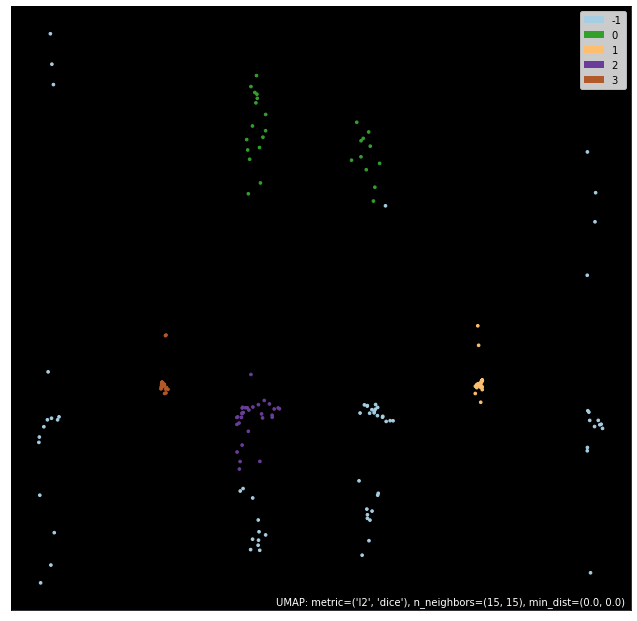

In [15]:
clf.plot_2d_labels()

In [16]:
import seaborn as sns
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='Cluster', ylabel='Spending Score (1-100)'>

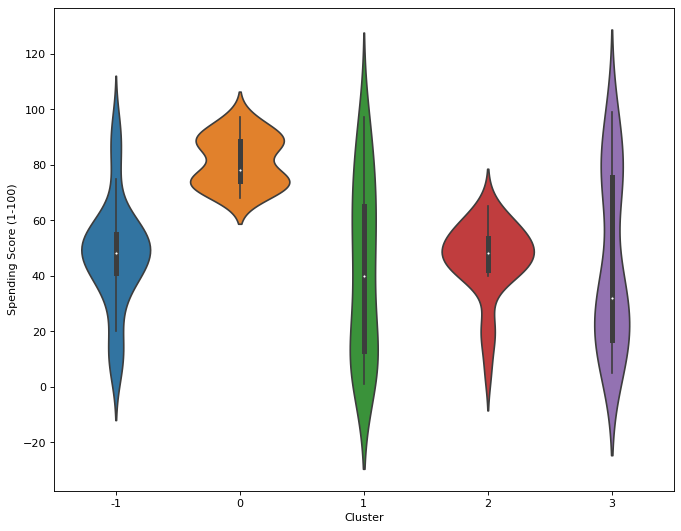

In [17]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Spending Score (1-100)", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

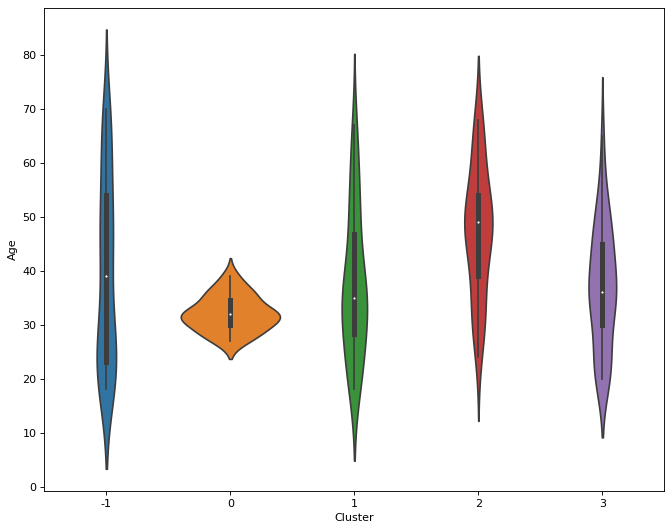

In [18]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

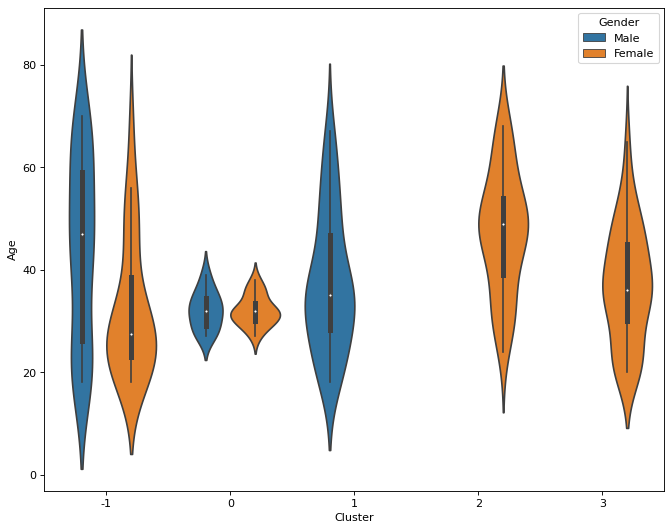

In [19]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results, hue = "Gender")

<AxesSubplot:xlabel='Cluster', ylabel='Annual Income (k$)'>

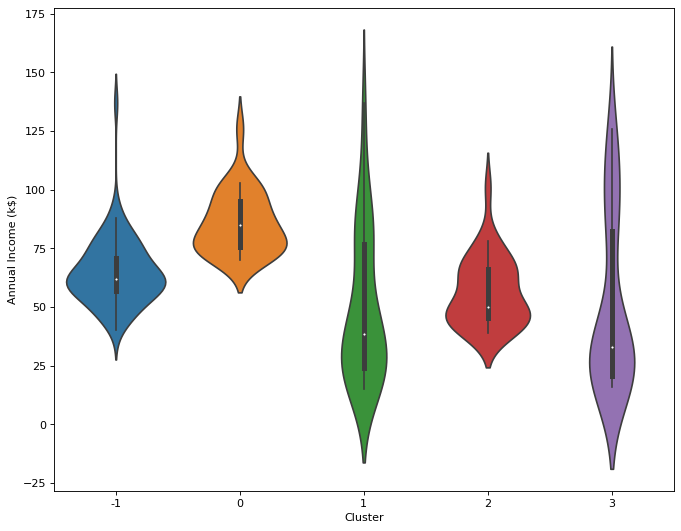

In [20]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Annual Income (k$)", data = results)

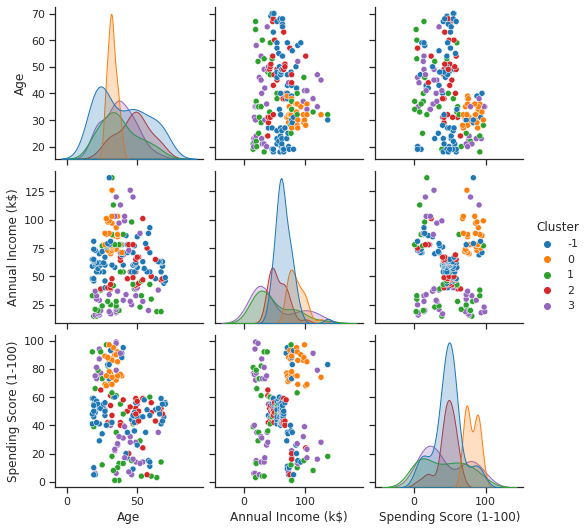

In [21]:
sns.set_theme(style="ticks")

sns.pairplot(results.drop("CustomerID", axis = 1), hue = "Cluster", palette = "tab10")